Hey! Welcome to this short overview and introduction to Deep Learning. The whole entire goal of this little notebook is just to give you an introduction into the main steps of the process of learning, so don't worry about any of the specific details. You especially don't have to worry about the code or what it means. Don't worry about reading the code, it's mainly just there so that you can run it and play around with it if you would like.

The main things that you should really pull away from this is the pipeline, and that the data that you get, and that you split it up into different sets (training, test, sometimes dev).

The general pipeline is just this:

1.   Gather and prepare data
2.   Build a Model
3.   Train that model with your training data
4.   Evaluate your model with your testing data
5.   Depending on your evaluation, try again or deploy


# **Installs and Imports**

This will import all of the libraries that we will be using below.

In [ ]:
import numpy as np

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt

print(tf.version.VERSION)

2.12.0


# **Getting a Dataset**

For this, we will be using the classic MNIST dataset of handwritten digits. This is a widely used dataset as it is simple, easy to access, and is even already in keras. It is just a collection of about 70,0000 28x28 grayscale images of handwritten digits 0-9.

For this data, we don't have to do much preparation on it as it is so simple and well prepared. However, the only thing that we have to do is "normalize" it. All this means is to take the values which are currently 0-255 integer pixel values, and convert them into easier to process decimal numbers, which in this case are values between 0-1. This is done by simply dividing by 255. This process makes it easier for the neural network to process the inputs that we give it, to make learning faster and easier.

It will also print one of the images in the training dataset so that you can see what these images look like. You can feel free to change the value of "index" to see different images within the dataset.

If you want to mess around with the datasets, feel free to adjust the "dataset_size" to see what changes it makes.

11490434/11490434 [==============================] - 0s 0us/step
Label = 2


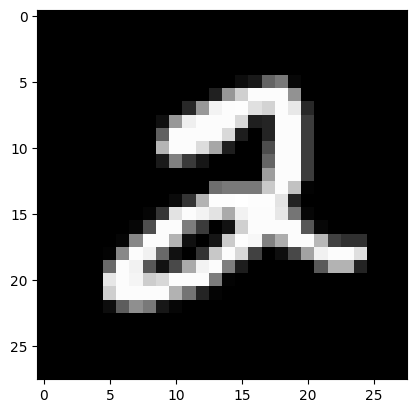

In [ ]:

# ---- Editable variables ----
use_all = False         # Set to True to use entire dataset, false otherwise
dataset_size = 3000     # if not using whole dataset, adjust the size here
input_norm_val = 255    # This changes the value that we normalize the input images with
                        # 255 is best, but try using 1 to see what happens without it

# # # Please don't change any of the information below # # #
# Load dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
if (use_all):
  train_labels = train_labels
  test_labels = test_labels
else:
  train_labels = train_labels[:dataset_size]
  test_labels = test_labels[:dataset_size]

# Print an example
index = 5
plt.imshow(train_images[index], cmap='gray')
print ("Label = " + str(np.squeeze(train_labels[index])))

# Normalize the images
if (use_all):
  train_images = train_images / input_norm_val
  test_images = test_images / input_norm_val
else:
  train_images = train_images[:dataset_size] / input_norm_val
  test_images = test_images[:dataset_size] / input_norm_val

# **Model 1 (Basic Neural Network)**
To start off, we will be building a very simple neural network. Don't worry about any of the code, this is only to highlight the major steps in learning.

Since we already gathered the dataset above, we don't need to worry about that step.

First, we are going to build the model itself.

After our meeting, it seems, you have a pretty good understanding of all of this stuff already. So I added some extra comments below on things that shouldn't be changed as it will break the model if they are. Other than that, feel free to mess around with it as much as you want to.

If you want to add more hidden layers, you can copy the line "tf.keras.layers.Dense(128, activation='relu')," and change the number of units (currently 128), or even the activation function if you would like. The same thing can be done with the dropout layer if you want. Just keep the paramater as a value [0,1].

In [ ]:
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),      # Don't Change - Must be first
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)                           # Don't Change - Must be last
])

# Don't change the below code
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

The code below will give you an overview of the network that was just built above. It will also show just how many parameters that these networks have, both per layer, as well as the sum for the whole network.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Initially after building the model, it is completely useless and produces essentially random results.

Let's see how accurate it is initially

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test Loss: " + str(test_loss))
print("Test Accuracy: " + str(test_acc * 100) + "%")

94/94 [==============================] - 1s 2ms/step - loss: 2.4672 - sparse_categorical_accuracy: 0.0870
Test Loss: 2.4671573638916016
Test Accuracy: 8.699999749660492%


So to fix this and make it useful to us, we can go ahead and train it with the dataset that we setup above.

In [ ]:
# Feel free to change the values below
num_epochs = 10       # Basically controls the amount of training that happens
batch_size = 16       # Feel free to mess with this, it is best if it is a power of 2 though

# Train the model - Don't change below code
model.fit(
    train_images,
    train_labels,
    epochs=num_epochs,
    batch_size=batch_size
)

Epoch 1/10
188/188 [==============================] - 1s 4ms/step - loss: 0.8730 - sparse_categorical_accuracy: 0.7503
Epoch 2/10
188/188 [==============================] - 1s 4ms/step - loss: 0.3703 - sparse_categorical_accuracy: 0.8960
Epoch 3/10
188/188 [==============================] - 1s 6ms/step - loss: 0.2595 - sparse_categorical_accuracy: 0.9280
Epoch 4/10
188/188 [==============================] - 1s 6ms/step - loss: 0.2085 - sparse_categorical_accuracy: 0.9423
Epoch 5/10
188/188 [==============================] - 1s 5ms/step - loss: 0.1703 - sparse_categorical_accuracy: 0.9580
Epoch 6/10
188/188 [==============================] - 1s 3ms/step - loss: 0.1351 - sparse_categorical_accuracy: 0.9650
Epoch 7/10
188/188 [==============================] - 1s 4ms/step - loss: 0.1064 - sparse_categorical_accuracy: 0.9747
Epoch 8/10
188/188 [==============================] - 1s 4ms/step - loss: 0.1049 - sparse_categorical_accuracy: 0.9717
Epoch 9/10
188/188 [============================

Now that we have trained the model with our dataset, we can go ahead and test it with our test set to see how we did.

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test Loss: " + str(test_loss))
print("Test Accuracy: " + str(test_acc * 100) + "%")

94/94 [==============================] - 1s 5ms/step - loss: 0.3092 - sparse_categorical_accuracy: 0.9043
Test Loss: 0.30922266840934753
Test Accuracy: 90.43333530426025%


That's the basics of a simple neural network. While it is really simple, it has a lot of parameters and could have a better accuracy.

Note: While we can improve the accuracy some more without using models like CNNs, it would take a much larger network and would take a good amount of time to get trained correctly.

# **Model 2 (Convolutional Neural Network)**

Over the summer, we most likely won't be doing a ton of making our own models, if at all. Instead, we will be taking the models that other people have made, and importing them to use them (and then making changes to them).

Below is an example of that. Except, we will not be changing the basic architecture of this model as it is already set up for what we would like.

Again, please do not worry about any of the code. This is just to provide an example of a CNN and to show that this process isn't too scary as it is only a couple of lines of code.

This model is a convolutional neural network (CNN), which is a type of neural network that is really good for handling images (as well as speech or audio signal inputs). At this stage, don't worry too much about the inner-workings of a CNN.

I have pre-trained a CNN to solve the same dataset as above. It can be accessed with the "my_model.keras" file that I have shared with you.

In [ ]:
# Import the saved model
conv_model = tf.keras.models.load_model('my_model.keras')

# Print a summary of the network
conv_model.summary()

# Test the new model
test_loss, test_acc = conv_model.evaluate(test_images, test_labels)
print("Test Loss: " + str(test_loss * 100))
print("Test Accuracy: " + str(test_acc * 100))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 70)                9030      
                                                        

That's it! It is essentially a single line of code to import one of these models.

As a side note, I only worked on this model for about 10 minutes, so the accuracy is not nearly what it could be if I had spent a little more time on it. It is not uncommon for people to get 99.9% accuracy for this problem when using a CNN instead of a regular neural network.

# **Additional Resources**
During our meetings, we discussed some extra resources. Here is where they can be found.

3Blue1Brown - Deep Learning Series

https://www.youtube.com/watch?v=aircAruvnKk&t=2s

This is a really solid series that introduces deep learning and provides really great visuals, but don't feel pressured to watch the whole thing if you end up checking it out. He goes into way more detail than you would need to know.